In [207]:
import numpy as np

class KMeans():
    # This function initializes the KMeans class
    def __init__(self, k = 3, num_iter = 1000, order = 2):
        # Set a seed for easy debugging and evaluation
        np.random.seed(42)
        
        # This variable defines how many clusters to create
        # default is 3
        self.k = k

        # This variable defines how many iterations to recompute centroids
        # default is 1000
        self.num_iter = num_iter

        # This variable stores the coordinates of centroids
        self.centers = None

        # This variable defines whether it's K-Means or K-Medians
        # an order of 2 uses Euclidean distance for means
        # an order of 1 uses Manhattan distance for medians
        # default is 2
        if order == 1 or order == 2:
            self.order = order
        else:
            raise Exception("Unknown Order")     

    # This function fits the model with input data (training)
    def fit(self, X):
        # m, n represent the number of rows (observations) 
        # and columns (positions in each coordinate)
        m, n = X.shape

        # self.centers are a 2d-array of 
        # (number of clusters, number of dimensions of our input data)
        self.centers = np.zeros((self.k, n))

        # self.cluster_idx represents the cluster index for each observation
        # which is a 1d-array of (number of observations)
        self.cluster_idx = np.zeros(m)

        ##### TODO 1 ######
        #
        # Task: initialize self.centers
        #
        # Instruction: 
        # For each dimension (feature) in X, use the 10th percentile and 
        # the 90th percentile to form a uniform distribution. Then, we will initialize 
        # the values of each center by randomly selecting values from the distributions.
        #
        # Note:
        # This method is by no means the best initialization method. However, we would
        # like you to follow our guidelines in this HW. We will ask you to discuss some better
        # initializaiton methods in the notebook.
        #
        # Hint:
        # 1. np.random.uniform(), np.percentile() might be useful
        # 2. make sure to look over its parameters if you're not sure
        ####################
        raise NotImplementedError
        for i in range(n):
            self.centers[:,i] = np.random.uniform(low=np.percentile(X[i],10),high=np.percentile(X[i],90))
        ##### END TODO 1 #####

        for i in range(self.num_iter):
            # new_centers are a 2d-array of 
            # (number of clusters, number of dimensions of our input data)
            new_centers = np.zeros((self.k, n))

            ##### TODO 2 ######
            #
            # Task: calculate the distance and create cluster index for each observation
            #
            # Instruction:
            # You should calculate the distance between each observation and each centroid
            # using specified self.order. Then, you should derive the cluster index for 
            # each observation based on the minimum distance between an observation and 
            # each of the centers.
            #
            # Hint:
            # 1. np.linalg.norm() might be useful, along with parameter axis, ord
            # for that function
            # 2. You can transpose an array using .T at the end
            # 3. np.argmin() might be useful along with parameter axis in finding
            # the desired cluster index of all observations
            #
            # IMPORTANT: 
            # Copy-paste this part of your implemented code
            # to the predict function, and return cluster_idx in that function
            ####################
            raise NotImplementedError
            for features in X:
                
                distances = [np.linalg.norm(features-self.centers[centers]) for centers in self.centers]
                classification = distances.index(min(distances))
                self.cluster_idx[classification].append(features)
            ##### END TODO 2 #####

            ##### TODO 3 ######
            #
            # Task: calculate the coordinates of new_centers based on cluster_idx
            #
            # Instruction:
            # You should assign the coordinates of the new_center by calculating
            # mean/median of the coordinates of observations belonging to the same
            # cluster.
            #
            # Hint:
            # 1. np.mean(), np.median() with axis might be helpful
            ####################
            raise NotImplementedError
            for idx in range(self.k):
                cluster_coordinates = X[cluster_idx == idx]
                if self.order == 2:
                    cluster_center = ...
                elif self.order == 1:
                    cluster_center = ...                    
                new_centers[idx, :] = ...
            ##### END TODO 3 #####

            ##### TODO 4 ######
            #
            # Task: determine early stop and update centers and cluster_idx
            #
            # Instructions:
            # You should stop tranining as long as cluster index for all
            # observations is the same as the previous iteration
            # Hint:
            # 1. .all() might be helpful
            ####################
            raise NotImplementedError
            if ...:
                print(f"Early Stopped at Iteration {i}")
                return self
            self.centers = ...
            self.cluster_idx = ...
            ##### END TODO 4 #####
        return self


    # This function makes predictions with input data
    # Copy-paste your code from TODO 2 and return cluster_idx
    def predict(self, X):
        raise NotImplementedError
        ...


In [208]:
km=KMeans()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE, MDS

C:\Users\shaag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\shaag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


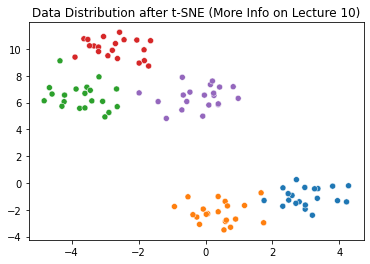

In [2]:
X, y = make_blobs(n_samples=100, centers=5, n_features=10, random_state=42, cluster_std=2, center_box=(0, 10))

dims = TSNE(random_state=42).fit_transform(X)
dim1, dim2 = dims[:, 0], dims[:, 1]
sns.scatterplot(x=dim1, y=dim2, hue=y, palette='tab10', legend=False)
plt.title('Data Distribution after t-SNE (More Info on Lecture 10)');

In [3]:
X

array([[ 8.37471832,  5.77261268,  8.6924598 ,  2.7611531 ,  0.61632267,
         3.7378464 ,  0.70939616,  6.5062719 ,  4.5805427 ,  8.43992128],
       [ 6.15536571,  4.74781323,  3.57530123,  3.22541738,  6.219511  ,
         3.429489  ,  2.46796694,  6.68407477,  2.9669732 ,  2.75201221],
       [ 1.79603785, 11.08131227,  9.63713058,  4.34522021,  3.48693866,
         2.38550706,  2.22495644, 12.45534742,  5.52037389,  5.57325345],
       [ 1.24453797, 12.76457635,  8.10690611,  2.92681455,  3.19853766,
         1.03160415,  3.49060739,  5.27274912,  4.51480238,  1.36627183],
       [ 3.08839152,  6.82737422, 10.65075391,  2.14385723, -0.14476763,
         2.75825205,  3.44054182,  4.04713056,  4.45905436,  2.14166421],
       [ 0.9146597 ,  8.66585242,  6.63451039,  4.3820303 ,  1.23761498,
         2.36804692,  4.35320792,  9.01091708,  6.5262509 ,  6.93183395],
       [ 0.86648789,  3.35517461, -2.41475324,  7.63134394,  2.52154587,
        10.21433857,  2.08188816,  5.64825612

In [4]:
y

array([0, 2, 0, 1, 1, 0, 4, 3, 1, 3, 0, 3, 2, 1, 2, 4, 4, 2, 1, 2, 3, 4,
       4, 0, 3, 2, 4, 3, 2, 1, 3, 4, 4, 2, 4, 3, 4, 2, 2, 4, 0, 3, 3, 3,
       1, 3, 2, 1, 2, 0, 3, 4, 0, 0, 1, 2, 1, 2, 4, 2, 4, 4, 0, 3, 0, 1,
       4, 1, 0, 4, 3, 2, 3, 2, 1, 3, 1, 0, 3, 0, 2, 4, 0, 1, 0, 1, 1, 0,
       0, 0, 2, 2, 1, 0, 4, 1, 3, 3, 4, 1])

In [5]:
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans as Ref
from sklearn.manifold import TSNE, MDS
from sklearn.metrics import mean_squared_error

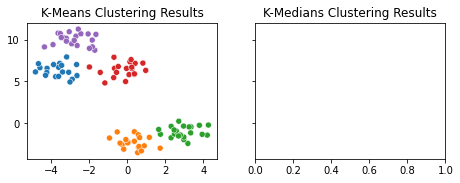

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 2.5), sharey=True)

# This is a reference of KMeans from sklearn's implementation, which we will be using later to evaluate our model
ref_kmeans = Ref(5, init='random').fit(X).predict(X)

# This is to evaluate our KMeans model predictions

sns.scatterplot(x=dim1, y=dim2, hue=ref_kmeans, palette='tab10', ax=axes[0], legend=False)
axes[0].set_title('K-Means Clustering Results')

# This is to evaluate our KMedians model predictions
#y_pred_kmedians = KMeans(5, order=1).fit(X).predict(X)
#sns.scatterplot(x=dim1, y=dim2, hue=y_pred_kmedians, palette='tab10', ax=axes[1], legend=False)
axes[1].set_title('K-Medians Clustering Results');

In [7]:
k=3

In [8]:
num_iter=1000
order=2

In [9]:
m, n = X.shape

In [10]:
centers = np.zeros((k, n))

In [11]:
centers.shape

(3, 10)

In [12]:
cluster_idx = np.zeros(m)

In [13]:
cluster_idx

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
n

10

In [60]:
for i in range(n):
            centers[:,i] = np.random.uniform(low=np.percentile(X[:,i],10),high=np.percentile(X[:,i],90),size=k)

In [61]:
centers

array([[ 6.33585367,  1.78165324, -0.37111069,  7.34532503,  5.22495344,
         1.24065794,  2.31975131,  1.27785235,  4.76225647,  3.3185674 ],
       [ 4.49638175,  1.46412302,  3.47921887,  6.1336106 ,  9.26507153,
         2.08759983,  0.48155692,  8.52868881,  5.98383063,  0.91441275],
       [-0.14989025,  0.47363132,  5.26327343,  7.90426015,  6.23996697,
         5.24486013,  3.90611655,  3.64663369,  7.42006537,  1.54600435]])

In [62]:
low=np.percentile(X[3],90)

In [63]:
X

array([[ 8.37471832,  5.77261268,  8.6924598 ,  2.7611531 ,  0.61632267,
         3.7378464 ,  0.70939616,  6.5062719 ,  4.5805427 ,  8.43992128],
       [ 6.15536571,  4.74781323,  3.57530123,  3.22541738,  6.219511  ,
         3.429489  ,  2.46796694,  6.68407477,  2.9669732 ,  2.75201221],
       [ 1.79603785, 11.08131227,  9.63713058,  4.34522021,  3.48693866,
         2.38550706,  2.22495644, 12.45534742,  5.52037389,  5.57325345],
       [ 1.24453797, 12.76457635,  8.10690611,  2.92681455,  3.19853766,
         1.03160415,  3.49060739,  5.27274912,  4.51480238,  1.36627183],
       [ 3.08839152,  6.82737422, 10.65075391,  2.14385723, -0.14476763,
         2.75825205,  3.44054182,  4.04713056,  4.45905436,  2.14166421],
       [ 0.9146597 ,  8.66585242,  6.63451039,  4.3820303 ,  1.23761498,
         2.36804692,  4.35320792,  9.01091708,  6.5262509 ,  6.93183395],
       [ 0.86648789,  3.35517461, -2.41475324,  7.63134394,  2.52154587,
        10.21433857,  2.08188816,  5.64825612

In [64]:
X[:,1]

array([ 5.77261268,  4.74781323, 11.08131227, 12.76457635,  6.82737422,
        8.66585242,  3.35517461,  1.94926087, 11.02335987,  2.12061661,
       12.5832162 , -0.99812797,  0.56436278, 11.53482242, -1.92810152,
        5.96631716,  6.69668376, -0.44939204, 12.64981096,  1.08358414,
       -0.96544748,  0.86829936,  3.84081486,  7.68836815, -0.25150432,
       -0.8644751 ,  5.39006976,  0.67315178,  1.29446239,  8.57873644,
        3.80325969,  3.58966579,  3.89003156,  2.33787532,  7.61007416,
        1.51181501,  6.30140809,  1.46546571,  4.35482688,  1.92028087,
        9.94006024, -0.55286231, -2.44153923,  0.58030769,  7.90458978,
        5.04328429,  2.48165899, 10.88941257,  5.5457402 , 11.21994065,
       -0.8539127 ,  2.8987385 ,  9.64426901, 12.12142857, 10.18647294,
        5.21377189,  9.58004781, -0.51614227,  5.80268422,  0.43962371,
        8.71408324,  4.16509148,  9.84987963,  0.61152335, 10.22136821,
        8.50031323,  3.80436909, 11.89665223, 10.62871212,  6.80

In [226]:
centers.T

array([[6.52780104, 6.52780104, 6.52780104],
       [5.55585579, 5.55585579, 5.55585579],
       [9.63850078, 9.63850078, 9.63850078],
       [2.59321472, 2.59321472, 2.59321472],
       [3.16140741, 3.16140741, 3.16140741],
       [5.95536488, 5.95536488, 5.95536488],
       [7.21234157, 7.21234157, 7.21234157],
       [4.98853432, 4.98853432, 4.98853432],
       [6.29720978, 6.29720978, 6.29720978],
       [5.94543376, 5.94543376, 5.94543376]])

In [227]:
X

array([[ 8.37471832,  5.77261268,  8.6924598 ,  2.7611531 ,  0.61632267,
         3.7378464 ,  0.70939616,  6.5062719 ,  4.5805427 ,  8.43992128],
       [ 6.15536571,  4.74781323,  3.57530123,  3.22541738,  6.219511  ,
         3.429489  ,  2.46796694,  6.68407477,  2.9669732 ,  2.75201221],
       [ 1.79603785, 11.08131227,  9.63713058,  4.34522021,  3.48693866,
         2.38550706,  2.22495644, 12.45534742,  5.52037389,  5.57325345],
       [ 1.24453797, 12.76457635,  8.10690611,  2.92681455,  3.19853766,
         1.03160415,  3.49060739,  5.27274912,  4.51480238,  1.36627183],
       [ 3.08839152,  6.82737422, 10.65075391,  2.14385723, -0.14476763,
         2.75825205,  3.44054182,  4.04713056,  4.45905436,  2.14166421],
       [ 0.9146597 ,  8.66585242,  6.63451039,  4.3820303 ,  1.23761498,
         2.36804692,  4.35320792,  9.01091708,  6.5262509 ,  6.93183395],
       [ 0.86648789,  3.35517461, -2.41475324,  7.63134394,  2.52154587,
        10.21433857,  2.08188816,  5.64825612

In [65]:
for i in range(num_iter):
            # new_centers are a 2d-array of 
            # (number of clusters, number of dimensions of our input data)
            new_centers = np.zeros((k, n))
            distances=np.linalg.norm()

TypeError: _norm_dispatcher() missing 1 required positional argument: 'x'

In [229]:
new_centers

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [230]:
for i in X:
    print(i)

[8.37471832 5.77261268 8.6924598  2.7611531  0.61632267 3.7378464
 0.70939616 6.5062719  4.5805427  8.43992128]
[6.15536571 4.74781323 3.57530123 3.22541738 6.219511   3.429489
 2.46796694 6.68407477 2.9669732  2.75201221]
[ 1.79603785 11.08131227  9.63713058  4.34522021  3.48693866  2.38550706
  2.22495644 12.45534742  5.52037389  5.57325345]
[ 1.24453797 12.76457635  8.10690611  2.92681455  3.19853766  1.03160415
  3.49060739  5.27274912  4.51480238  1.36627183]
[ 3.08839152  6.82737422 10.65075391  2.14385723 -0.14476763  2.75825205
  3.44054182  4.04713056  4.45905436  2.14166421]
[0.9146597  8.66585242 6.63451039 4.3820303  1.23761498 2.36804692
 4.35320792 9.01091708 6.5262509  6.93183395]
[ 0.86648789  3.35517461 -2.41475324  7.63134394  2.52154587 10.21433857
  2.08188816  5.64825612  5.434257    4.2253311 ]
[ 4.92417287  1.94926087  5.77068501  9.29673557 11.95486698  6.67762063
  2.97616071  4.51832241  5.58839615  8.02642205]
[ 0.43287963 11.02335987 11.49646004 -0.35223989 

In [231]:
centers

array([[6.52780104, 5.55585579, 9.63850078, 2.59321472, 3.16140741,
        5.95536488, 7.21234157, 4.98853432, 6.29720978, 5.94543376],
       [6.52780104, 5.55585579, 9.63850078, 2.59321472, 3.16140741,
        5.95536488, 7.21234157, 4.98853432, 6.29720978, 5.94543376],
       [6.52780104, 5.55585579, 9.63850078, 2.59321472, 3.16140741,
        5.95536488, 7.21234157, 4.98853432, 6.29720978, 5.94543376]])

In [66]:

dist = np.linalg.norm(X - centers[0,:],axis=1,ord=2).reshape(-1,1)



dist = np.append(dist,np.linalg.norm(X - centers[1,:],axis=1,ord=2).reshape(-1,1),axis=1)
dist = np.append(dist,np.linalg.norm(X - centers[2,:],axis=1,ord=2).reshape(-1,1),axis=1)





In [67]:
dist[:10:]

array([[14.38450543, 14.57479589, 15.71117504],
       [ 8.94157977,  7.27354113, 10.89222208],
       [18.74017653, 14.65447542, 16.25143956],
       [16.22648943, 15.16276599, 14.97212562],
       [15.03599612, 14.8243664 , 13.01965113],
       [15.22871846, 13.92702587, 13.2141295 ],
       [12.038039  , 13.68851719, 11.19561489],
       [12.33615879, 10.81762278, 10.57395021],
       [19.0118008 , 15.90418689, 16.96256919],
       [ 9.78532856, 11.78681817, 10.38235685]])

In [68]:

dist = np.linalg.norm(X - centers[0,:],axis=1,ord=1).reshape(-1,1)



dist = np.append(dist,np.linalg.norm(X - centers[1,:],axis=1,ord=1).reshape(-1,1),axis=1)
dist = np.append(dist,np.linalg.norm(X - centers[2,:],axis=1,ord=1).reshape(-1,1),axis=1)





In [69]:
dist[:10:]

array([[38.92522809, 38.2505727 , 45.31633957],
       [22.31263266, 21.0198804 , 28.91677066],
       [44.01577826, 37.13223092, 42.51570194],
       [38.57173816, 37.69518744, 33.8877569 ],
       [36.77400474, 38.2055921 , 34.03399322],
       [42.53281872, 34.91194763, 34.12042189],
       [27.23666797, 36.12417121, 29.02774979],
       [31.2702447 , 27.6597503 , 25.71097165],
       [46.21626754, 41.68097779, 39.69717507],
       [19.11974745, 29.19183092, 25.65185313]])

In [70]:
cluster_idx=np.argmin(dist,axis=1)

In [71]:
cluster_idx

array([1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0,
       2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1,
       2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 1], dtype=int64)

In [72]:
new_centers = np.zeros((k, n))


In [73]:
new_centers

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [74]:
new_centers.shape

(3, 10)

In [75]:
for idx in range(k):
    cluster_coordinates = X[cluster_idx == idx]
    cluster_center=np.mean(cluster_coordinates)
    new_centers[idx, :] = cluster_center

In [76]:
new_centers

array([[4.38238216, 4.38238216, 4.38238216, 4.38238216, 4.38238216,
        4.38238216, 4.38238216, 4.38238216, 4.38238216, 4.38238216],
       [4.84214046, 4.84214046, 4.84214046, 4.84214046, 4.84214046,
        4.84214046, 4.84214046, 4.84214046, 4.84214046, 4.84214046],
       [4.4414634 , 4.4414634 , 4.4414634 , 4.4414634 , 4.4414634 ,
        4.4414634 , 4.4414634 , 4.4414634 , 4.4414634 , 4.4414634 ]])

In [77]:
X[cluster_idx==idx]

array([[ 1.24453797, 12.76457635,  8.10690611,  2.92681455,  3.19853766,
         1.03160415,  3.49060739,  5.27274912,  4.51480238,  1.36627183],
       [ 3.08839152,  6.82737422, 10.65075391,  2.14385723, -0.14476763,
         2.75825205,  3.44054182,  4.04713056,  4.45905436,  2.14166421],
       [ 0.9146597 ,  8.66585242,  6.63451039,  4.3820303 ,  1.23761498,
         2.36804692,  4.35320792,  9.01091708,  6.5262509 ,  6.93183395],
       [ 4.92417287,  1.94926087,  5.77068501,  9.29673557, 11.95486698,
         6.67762063,  2.97616071,  4.51832241,  5.58839615,  8.02642205],
       [ 0.43287963, 11.02335987, 11.49646004, -0.35223989,  6.08431642,
        -2.0701305 ,  2.73885224,  6.42419873,  4.88143392,  1.66689236],
       [ 6.79552176,  0.56436278,  4.18701022,  8.20500415,  4.92443235,
         8.34820079,  1.07801602,  3.44265565,  7.58481732, -1.24766352],
       [-2.31592297, 11.53482242, 12.5687388 ,  4.18832163, -1.22049026,
         0.86557695,  5.57624473,  3.83222539

In [78]:
centers 

array([[ 6.33585367,  1.78165324, -0.37111069,  7.34532503,  5.22495344,
         1.24065794,  2.31975131,  1.27785235,  4.76225647,  3.3185674 ],
       [ 4.49638175,  1.46412302,  3.47921887,  6.1336106 ,  9.26507153,
         2.08759983,  0.48155692,  8.52868881,  5.98383063,  0.91441275],
       [-0.14989025,  0.47363132,  5.26327343,  7.90426015,  6.23996697,
         5.24486013,  3.90611655,  3.64663369,  7.42006537,  1.54600435]])

In [206]:
np.all(new_centers,centers)

TypeError: only integer scalar arrays can be converted to a scalar index

In [205]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9


In [59]:
for i in range(n):
    centroids[:,i] = np.random.uniform(low=np.percentile(X[:,i],10),high=np.percentile(X[:,i],90),size=3)
centroidsold = centroids.copy()
for iter_ in range(num_iter):
    dist = np.linalg.norm(X - centroids[0,:],axis=1).reshape(-1,1)
    for class_ in range(1,k):
        dist = np.append(dist,np.linalg.norm(X - centroids[class_,:],axis=1).reshape(-1,1),axis=1)
        classes = np.argmin(dist,axis=1)
        print(classes)

[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1]
[0 2 1 1 1 2 2 2 1 2 0 2 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 0 1 1 2 2
 2 1 2 2 2 2 2 1 1 2 0 1 1 2 2 0 0 1 2 2 2 2 2 2 2 0 2 0 2 2 1 0 2 2 2 2 2
 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1]
[0 2 1 1 1 2 2 2 1 2 0 2 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 0 1 1 2 2
 2 1 2 2 2 2 2 1 1 2 0 1 1 2 2 0 0 1 2 2 2 2 2 2 2 0 2 0 2 2 1 0 2 2 2 2 2
 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1

 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1]
[0 2 1 1 1 2 2 2 1 2 0 2 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 0 1 1 2 2
 2 1 2 2 2 2 2 1 1 2 0 1 1 2 2 0 0 1 2 2 2 2 2 2 2 0 2 0 2 2 1 0 2 2 2 2 2
 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1]
[0 2 1 1 1 2 2 2 1 2 0 2 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 0 1 1 2 2
 2 1 2 2 2 2 2 1 1 2 0 1 1 2 2 0 0 1 2 2 2 2 2 2 2 0 2 0 2 2 1 0 2 2 2 2 2
 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 

 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1]
[0 2 1 1 1 2 2 2 1 2 0 2 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 0 1 1 2 2
 2 1 2 2 2 2 2 1 1 2 0 1 1 2 2 0 0 1 2 2 2 2 2 2 2 0 2 0 2 2 1 0 2 2 2 2 2
 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1]
[0 2 1 1 1 2 2 2 1 2 0 2 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 0 1 1 2 2
 2 1 2 2 2 2 2 1 1 2 0 1 1 2 2 0 0 1 2 2 2 2 2 2 2 0 2 0 2 2 1 0 2 2 2 2 2
 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 

[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1]
[0 2 1 1 1 2 2 2 1 2 0 2 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 0 1 1 2 2
 2 1 2 2 2 2 2 1 1 2 0 1 1 2 2 0 0 1 2 2 2 2 2 2 2 0 2 0 2 2 1 0 2 2 2 2 2
 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1]
[0 2 1 1 1 2 2 2 1 2 0 2 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 0 1 1 2 2
 2 1 2 2 2 2 2 1 1 2 0 1 1 2 2 0 0 1 2 2 2 2 2 2 2 0 2 0 2 2 1 0 2 2 2 2 2
 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1

 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1]
[0 2 1 1 1 2 2 2 1 2 0 2 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 0 1 1 2 2
 2 1 2 2 2 2 2 1 1 2 0 1 1 2 2 0 0 1 2 2 2 2 2 2 2 0 2 0 2 2 1 0 2 2 2 2 2
 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1]
[0 2 1 1 1 2 2 2 1 2 0 2 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 0 1 1 2 2
 2 1 2 2 2 2 2 1 1 2 0 1 1 2 2 0 0 1 2 2 2 2 2 2 2 0 2 0 2 2 1 0 2 2 2 2 2
 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1]
[0 2 1 1 1 2 2 2 1 2 0 2 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 0 1 1 2 2
 2 1 2 2 2 2 2 1 1 2 0 1 1 2 2 0 0 1 2 2 2 2 2 2 2 0 2 

 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1]
[0 2 1 1 1 2 2 2 1 2 0 2 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 0 1 1 2 2
 2 1 2 2 2 2 2 1 1 2 0 1 1 2 2 0 0 1 2 2 2 2 2 2 2 0 2 0 2 2 1 0 2 2 2 2 2
 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1]
[0 2 1 1 1 2 2 2 1 2 0 2 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 0 1 1 2 2
 2 1 2 2 2 2 2 1 1 2 0 1 1 2 2 0 0 1 2 2 2 2 2 2 2 0 2 0 2 2 1 0 2 2 2 2 2
 2 2 1 0 2 2 2 2 0 2 0 1 1 0 2 0 1 2 1 0 2 1 1 0 1 2]
[0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 

In [57]:
for i in range(n):
    centroids[:,i] = np.random.uniform(low=np.percentile(X[:,i],10),high=np.percentile(X[:,i],90,),size=3)

In [58]:
centroids

array([[ 1.34891435,  6.78532003,  6.60050344,  2.76200644,  7.44791543,
         6.10717999,  1.13697085,  6.45564989,  8.22828073,  5.415885  ],
       [ 6.67559669,  4.45684027, -0.43935323,  2.2411901 ,  6.26597015,
         1.82812488,  0.84588545,  3.18180221,  7.63531841,  4.92006966],
       [ 1.58872855,  5.21953467,  3.30973345,  8.64831259,  1.53651057,
         7.32993035,  1.30664635,  5.05025029,  4.80758846,  0.44702446]])